## Amazon Food Rating Prediction From Reviews

Given *Amazon food reviews*, let's try to predict the **rating** associated with a given review.

We will use a TensorFlow ANN to make our predictions.

Data source: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import re
from nltk.corpus import stopwords

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

import tensorflow as tf

from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('archive/Reviews.csv', nrows=50000)
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
49995,49996,B00430B73W,AKW867T7C6HF8,HWJ3,0,0,5,1261180800,Grown to really like them,My sister introduced me to these. They have be...
49996,49997,B00430B73W,A2PEHNEDMHOYTW,L. Allen,0,0,5,1258934400,Healthy Snack at a great price!,A friend recommended these bars and I fell in ...
49997,49998,B00430B73W,A2QH2KF2IAB143,"J. A. Meyers ""Jan""",0,0,5,1257379200,Raw Revolution Hazelnut Cashew,Fabulous! I take one to work with me every da...
49998,49999,B00430B73W,AMX286UGXISMA,Aaron Dragushan,0,0,4,1247702400,"fantastic, but chew carefully",I love these bars and will continue to buy the...


In [3]:
reviews = data['Text'].copy()
ratings = data['Score'].copy()

### Creating Labels

In [4]:
print("Class Distribution:")
print(ratings.value_counts() / len(ratings))

Class Distribution:
Score
5    0.62260
4    0.14576
1    0.09442
3    0.08094
2    0.05628
Name: count, dtype: float64


In [5]:
labels = ratings.apply(lambda x: 1 if x==5 else 0)

In [6]:
labels.unique()

array([1, 0])

In [7]:
labels.value_counts() / len(labels)

Score
1    0.6226
0    0.3774
Name: count, dtype: float64

### Preprocessing Text Data

In [8]:
reviews

0        I have bought several of the Vitality canned d...
1        Product arrived labeled as Jumbo Salted Peanut...
2        This is a confection that has been around a fe...
3        If you are looking for the secret ingredient i...
4        Great taffy at a great price.  There was a wid...
                               ...                        
49995    My sister introduced me to these. They have be...
49996    A friend recommended these bars and I fell in ...
49997    Fabulous!  I take one to work with me every da...
49998    I love these bars and will continue to buy the...
49999    These are very good; nutritious, great flavor ...
Name: Text, Length: 50000, dtype: object

In [9]:
stop_words = stopwords.words('english')
stop_words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [10]:
def process_text(text):
    # Let's remove digits and stop words
    text = re.sub(r'\d+', ' ', text)
    text = text.split()
    text = " ".join([word for word in text if word.lower().strip() not in stop_words])
    return text

In [11]:
reviews = reviews.apply(process_text)
reviews

0        bought several Vitality canned dog food produc...
1        Product arrived labeled Jumbo Salted Peanuts.....
2        confection around centuries. light, pillowy ci...
3        looking secret ingredient Robitussin believe f...
4        Great taffy great price. wide assortment yummy...
                               ...                        
49995    sister introduced these. become favorite carry...
49996    friend recommended bars fell love them! Great ...
49997    Fabulous! take one work every day. feel depriv...
49998    love bars continue buy them, beware occasional...
49999    good; nutritious, great flavor texture minimal...
Name: Text, Length: 50000, dtype: object

In [12]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(reviews)

In [13]:
vocab_length = len(tokenizer.word_index) + 1
vocab_length

41212

In [14]:
sequences = tokenizer.texts_to_sequences(reviews)

max_seq_length = np.max(list(map(lambda x: len(x), sequences)))

sequences = pad_sequences(sequences, maxlen=max_seq_length, padding='post')

In [15]:
max_seq_length

np.int64(1033)

In [16]:
sequences

array([[  48,  230, 6800, ...,    0,    0,    0],
       [   7,  280, 1965, ...,    0,    0,    0],
       [4389,  192, 8332, ...,    0,    0,    0],
       ...,
       [1450,  176,    5, ...,    0,    0,    0],
       [  13,  226,  654, ...,    0,    0,    0],
       [   3, 1477,    6, ...,    0,    0,    0]],
      shape=(50000, 1033), dtype=int32)

### Splitting

In [17]:
train_sequences, test_sequences, train_labels, test_labels = train_test_split(sequences, labels, train_size=0.7, shuffle=True, random_state=100)

### Modeling

In [18]:
sequences.shape

(50000, 1033)

In [19]:
class_weights = dict(
    enumerate(
        class_weight.compute_class_weight(
            class_weight = 'balanced',
            classes = labels.unique(),
            y = labels
        )
    )
)

class_weights

{0: np.float64(0.8030838419530999), 1: np.float64(1.3248542660307365)}

/home/aditya/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1033)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 1033, 32)       │     1,318,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 1033, 32)       │         4,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33056)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        33,057 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,356,641 (5.18 MB)

 Trainable params: 1,356,641 (5.18 MB)

 Non-trainable params: 0 (0.00 B)

None


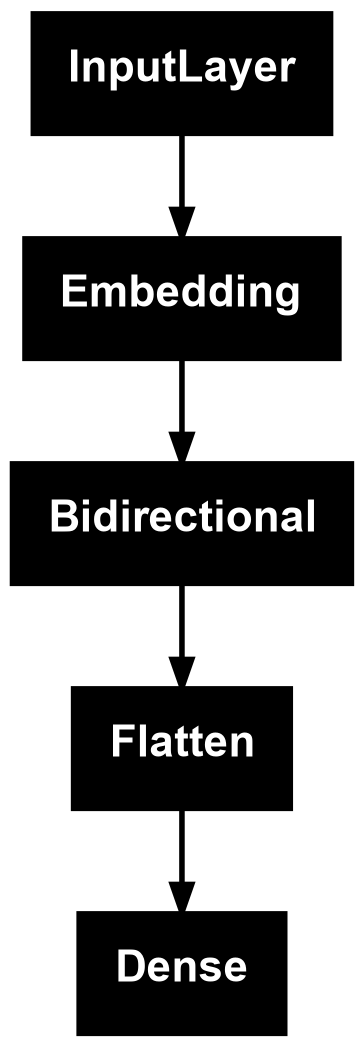

In [20]:
embedding_dim = 32

inputs = tf.keras.Input(shape=(max_seq_length,))

embedding = tf.keras.layers.Embedding(
    input_dim = vocab_length,
    output_dim = embedding_dim,
    input_length = max_seq_length
)(inputs)

gru_layer = tf.keras.layers.Bidirectional(
    tf.keras.layers.GRU(16, return_sequences=True)
)(embedding)

flatten = tf.keras.layers.Flatten()(gru_layer)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(flatten)

model = tf.keras.Model(inputs, outputs)

print(model.summary())
tf.keras.utils.plot_model(model)

### Training

In [21]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

history = model.fit(
    train_sequences,
    train_labels,
    validation_split = 0.2,
    class_weight = class_weights,
    batch_size = 32,
    epochs = 10,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor = 'val_accuracy',
            patience = 2,
            restore_best_weights = True
        )
    ]
)

Epoch 1/10


2025-12-22 21:47:34.430813: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 115696000 exceeds 10% of free system memory.


875/875 ━━━━━━━━━━━━━━━━━━━━ 309s 350ms/step - accuracy: 0.7427 - auc: 0.8091 - loss: 0.5072 - val_accuracy: 0.7860 - val_auc: 0.8601 - val_loss: 0.4769
Epoch 2/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 333s 362ms/step - accuracy: 0.8373 - auc: 0.9073 - loss: 0.3659 - val_accuracy: 0.7856 - val_auc: 0.8333 - val_loss: 0.5005
Epoch 3/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 325s 372ms/step - accuracy: 0.8944 - auc: 0.9533 - loss: 0.2579 - val_accuracy: 0.7907 - val_auc: 0.8485 - val_loss: 0.5407
Epoch 4/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 384s 374ms/step - accuracy: 0.9412 - auc: 0.9839 - loss: 0.1484 - val_accuracy: 0.7743 - val_auc: 0.8292 - val_loss: 0.7003
Epoch 5/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 385s 377ms/step - accuracy: 0.9711 - auc: 0.9950 - loss: 0.0787 - val_accuracy: 0.7663 - val_auc: 0.8073 - val_loss: 0.9231


### Results

In [22]:
model.evaluate(test_sequences, test_labels)

469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 92ms/step - accuracy: 0.7960 - auc: 0.8467 - loss: 0.5391


[0.5390687584877014, 0.7960000038146973, 0.8466979265213013]

In [23]:
model.predict(test_sequences)

469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step


array([[0.948678  ],
       [0.8538634 ],
       [0.6142844 ],
       ...,
       [0.7424187 ],
       [0.7222114 ],
       [0.97487736]], shape=(15000, 1), dtype=float32)

In [26]:
y_true = np.array(test_labels, dtype=int)
y_pred = np.squeeze(np.array(model.predict(test_sequences) >= 0.5, dtype=int))

469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 92ms/step


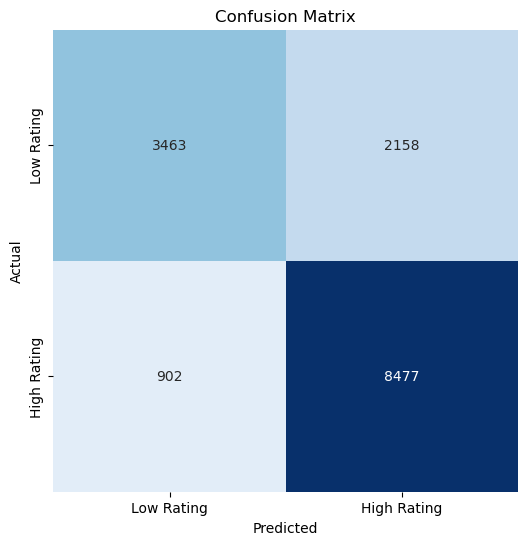

In [28]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)

plt.xlabel('Predicted')
plt.xticks(np.arange(2) + 0.5, ['Low Rating', 'High Rating'])

plt.ylabel('Actual')
plt.yticks(np.arange(2) + 0.5, ['Low Rating', 'High Rating'])

plt.title('Confusion Matrix')
plt.show()